In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib


In [3]:
data=pd.read_csv("Bengaluru_House_Data.csv")

In [4]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.shape

(13320, 9)

In [6]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
data2=data.drop(['area_type','society','balcony','availability'],axis='columns')
data2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
#CLEANING OF DATA STARTS

In [9]:
data2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
data2['size'].fillna(data2['size'].mode()[0], inplace=True)
data2['location'].fillna(data2['location'].mode()[0], inplace=True)
data2['bath'].fillna(data2['bath'].mode()[0], inplace=True)

In [11]:
data2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
data2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
data2['bhk']=data2['size'].apply(lambda x: int(x.split(' ')[0]))

In [14]:
data2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
data2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
data2[data2.bhk>15]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [17]:
data2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
data2[~data2['total_sqft'].apply(is_float)].head(15)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [20]:
def sqft_to_num(x):
    try:
        tokens = x.split('-')
        
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1]))/2
        else:
            return float(x)
    except:
        return None
  
    

In [21]:
sqft_to_num('2100-2850')

2475.0

In [22]:
data3 = data2.copy()
data3['total_sqft']=data3['total_sqft'].apply(sqft_to_num)
data3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [23]:
data3.loc[25]

location      Mangammanapalya
size                    3 BHK
total_sqft             1250.0
bath                      3.0
price                    56.0
bhk                         3
Name: 25, dtype: object

feature engineering


In [24]:
data4=data3.copy()

In [25]:
data4['price_per_sqft']=data4['price']*100000/data4['total_sqft']

In [26]:
data4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
data4_stats = data4['price_per_sqft'].describe()
data4_stats

count    1.327400e+04
mean     7.907501e+03
std      1.064296e+05
min      2.678298e+02
25%      4.266865e+03
50%      5.434306e+03
75%      7.311746e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [28]:
len(data4['location'].unique())

1305

In [29]:
data4.location=data4.location.apply(lambda x:x.strip())

location_statis=data4.groupby('location')['location'].agg('count')
location_statis.sort_values(ascending=False)

location
Whitefield               542
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1294, dtype: int64

In [30]:
#Get total number of categories where data points are less than 10
print('Total no of locations where data points are less than 10 = %s' % (len(location_statis[location_statis <= 10])))

Total no of locations where data points are less than 10 = 1053


In [31]:
less_than_10=location_statis[location_statis <= 10]
less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1053, dtype: int64

In [32]:
data5 = data4.copy()

data5.location = data5.location.apply(lambda x: 'other' if x in less_than_10 else x )
len(data5.location.unique())
     

242

In [33]:
data5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# removing of outlier

In [34]:
# Lets visualize the data where square fit per bedroom is less than 300
data5[(data5.total_sqft / data5.bhk) < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [35]:
data6 = data5[~((data5.total_sqft / data5.bhk) < 300)]
data6.shape

(12576, 7)

In [36]:
data6.price_per_sqft.describe()
     

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Text(0, 0.5, 'Count')

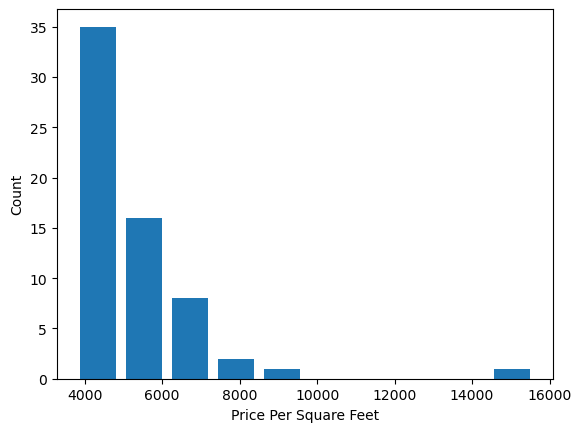

In [37]:
plt.hist(data6[data6.location == "Kothanur"].price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [38]:
# Function to remove outliers using pps(price per sqft)
def pps_outliers_removal(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean + std))] # 1 Sigma value i.e 68% of data
        df_out = pd.concat([df_out,reduced_df],ignore_index=True) # Storing data in 'df_out' dataframe
    return df_out

data7 = pps_outliers_removal(data6)
data7.shape
     

(10301, 7)

Text(0, 0.5, 'Count')

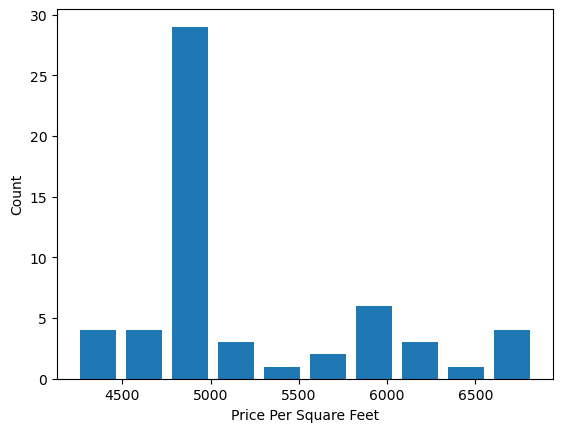

In [39]:
plt.hist(data7[data7.location == "Kothanur"].price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

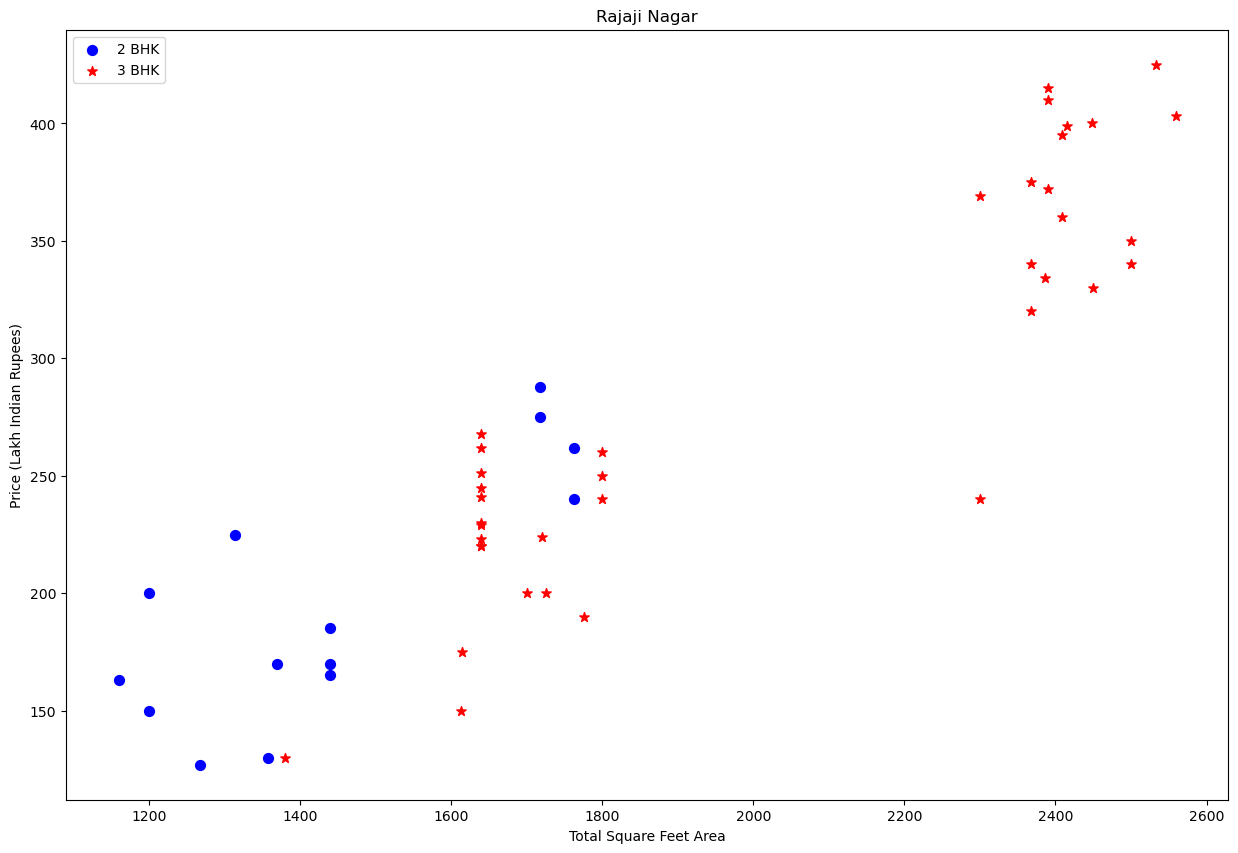

In [40]:

# Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like
def scatter_chart_plotting(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*', color='red',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
scatter_chart_plotting(data7,"Rajaji Nagar")

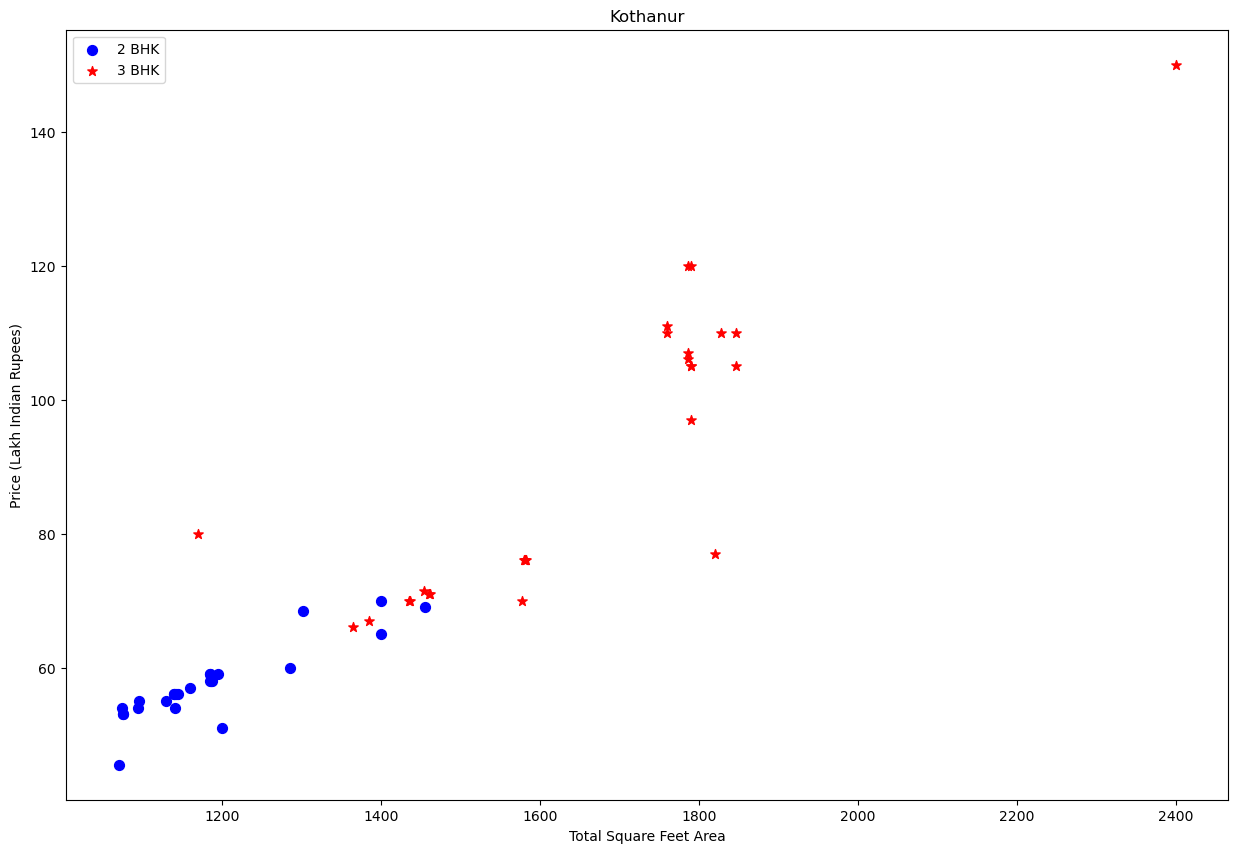

In [41]:
scatter_chart_plotting(data7,"Kothanur")

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data7 = remove_bhk_outliers(data7)
data7.shape

(7361, 7)

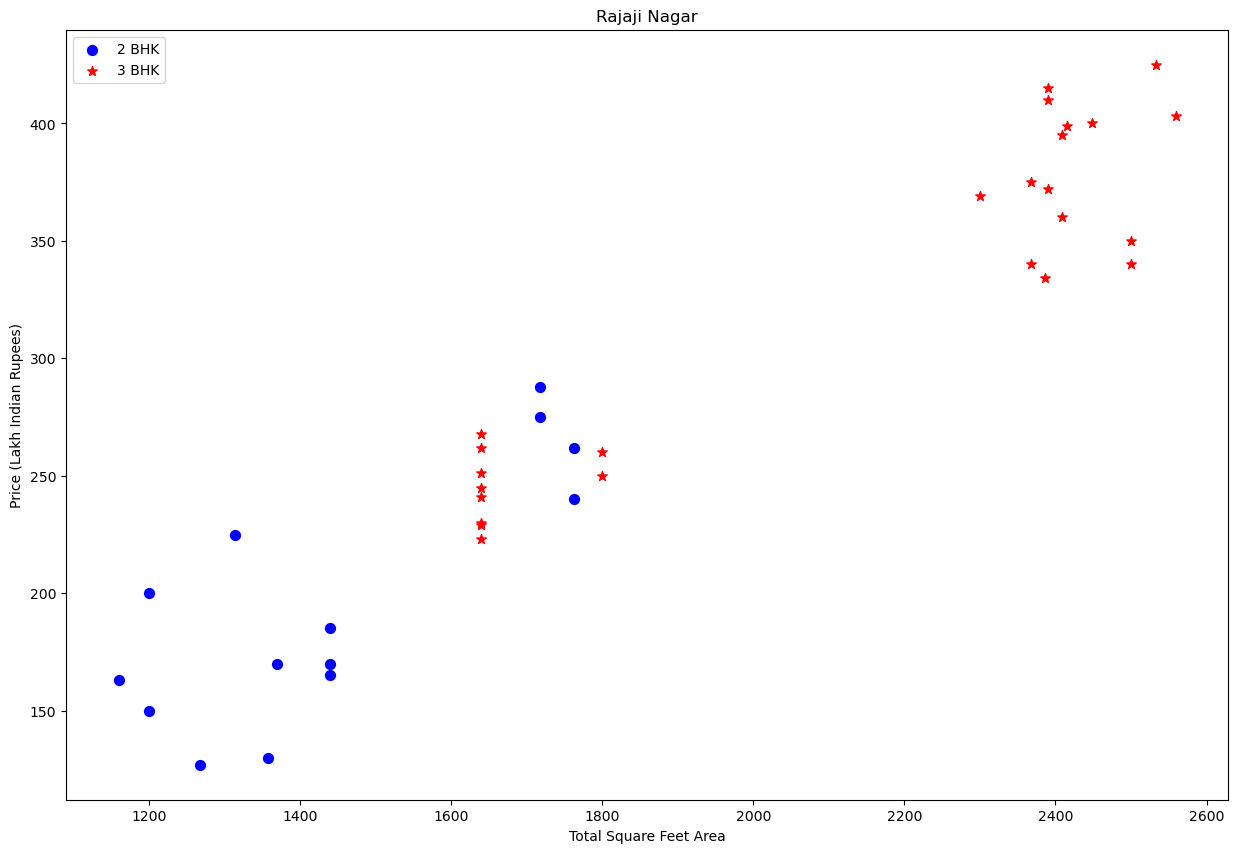

In [43]:
scatter_chart_plotting(data7,"Rajaji Nagar")

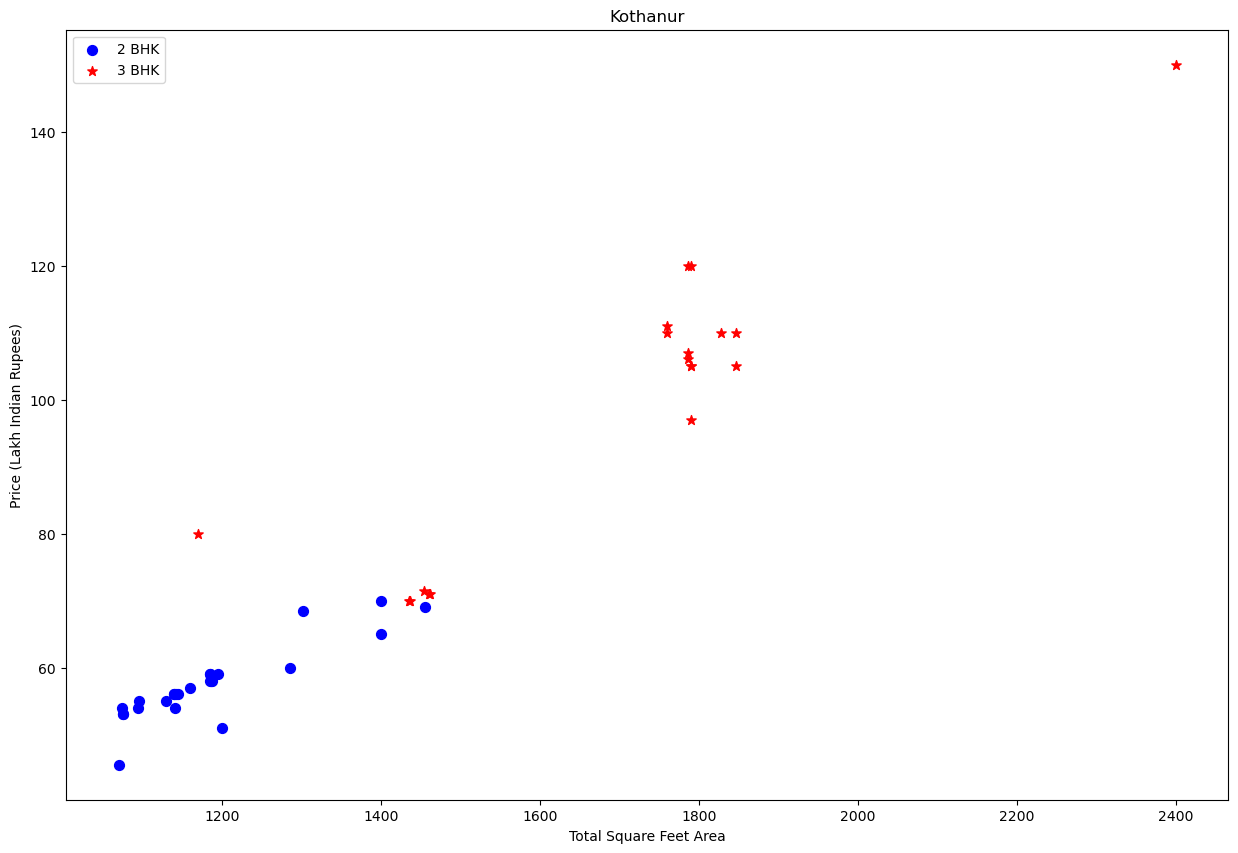

In [44]:
scatter_chart_plotting(data7,"Kothanur")

Text(0, 0.5, 'Count')

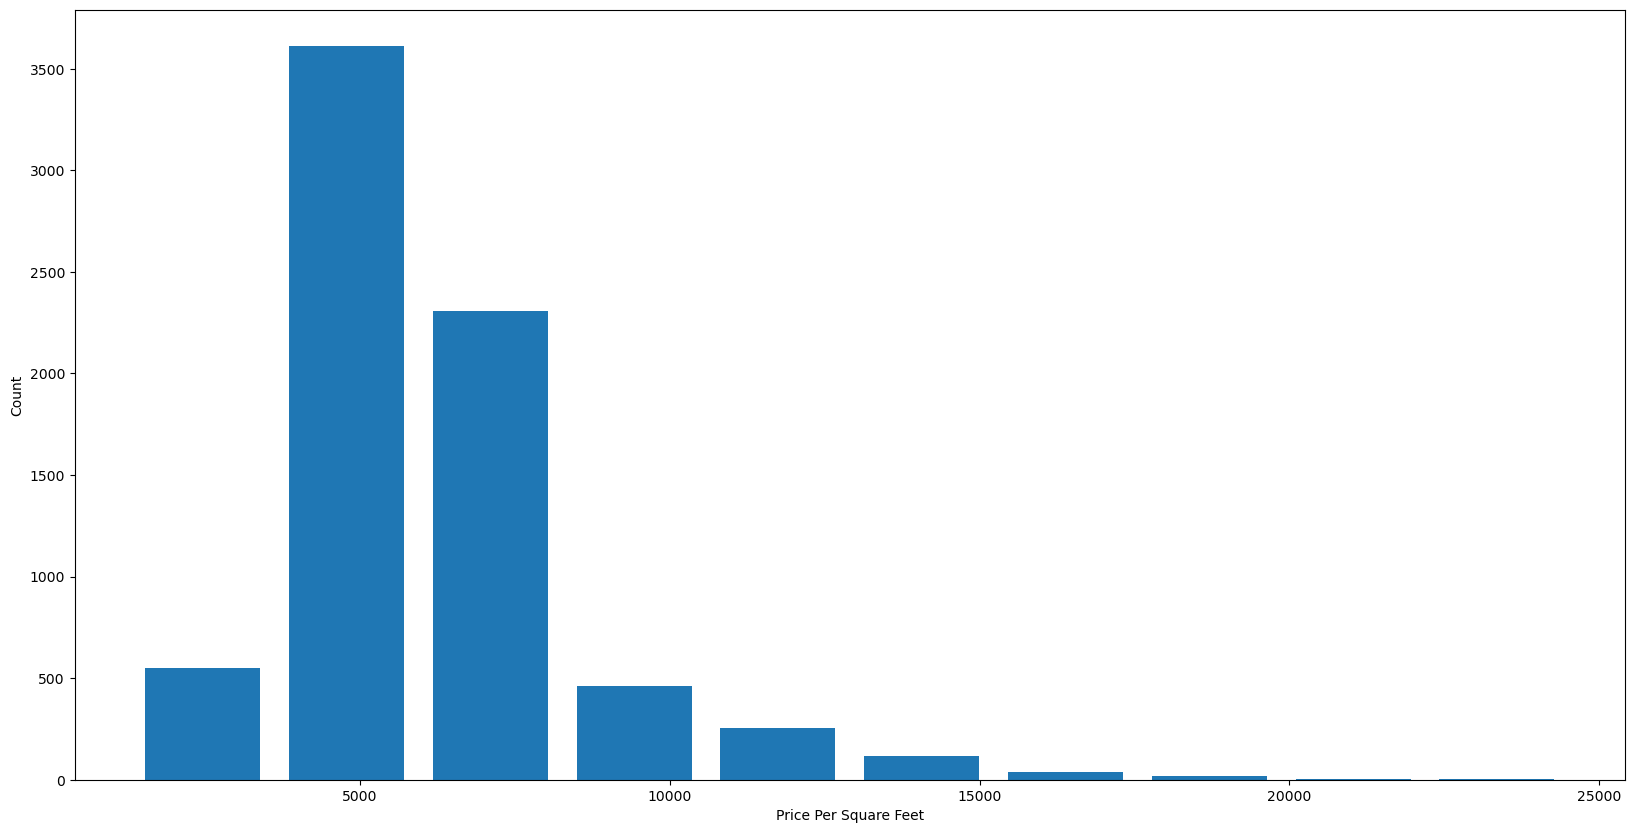

In [45]:
#histogram plotting and visualization of the price_per_sqft data after outlier removal

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [46]:
data7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [47]:
data7[data7.bath > data7.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5274,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6759,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8468,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [48]:
# Removing the outliers with more than (no of BHK + 2) bathrooms
data7 = data7[data7.bath < (data7.bhk + 2)]
data7.shape

(7282, 7)

In [49]:
data8 = data7.drop(['size', 'price_per_sqft'], axis='columns')
data8.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [52]:
pd.get_dummies(data8.location)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
dummy=pd.get_dummies(data8.location)

In [66]:
data9=pd.concat([data8,dummy.drop('other',axis='columns')],axis='columns')

In [67]:
data9.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
data10=data9.drop('location',axis='columns')

In [69]:
X=data10.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
Y=data9.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [84]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.8737160101647321

In [88]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.82123588, 0.85923391, 0.86877561, 0.8551165 , 0.81777938])

In [89]:
def price_prediction(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    
    return lr_clf.predict([x])[0]

        

In [90]:
price_prediction('1st Phase JP Nagar',1000,2,2)

D:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.51774962423593

In [94]:
price_prediction('1st Phase JP Nagar',1000,2,3)

D:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.13401310518861

In [92]:
price_prediction('Indira Nagar',1000,2,2)

D:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.28234401889515

In [97]:
price_prediction('Indira Nagar',1000,2,3)

D:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


189.89860749984783

In [99]:
# import pickle
# with open('home_price_prediction.pickle','wb') as f:
#     pickle.dump(lr_clf,f)

In [100]:
# import json
# columns={
#     'data_columns':[col.lower() for col in X.columns]
# }
# with open("columns.json","w") as f:
#     f.write(json.dumps(columns))